In [41]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [42]:
# Read in the dataframe

df = pd.read_csv("./resources/datasets/BeerDataScienceProject.tar.bz2", compression="bz2")

# Rank the top 3 breweries which produce the strongest beers.

In [43]:
# View dataframe
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [44]:
df.sort_values(["beer_ABV"], ascending=False).head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12913,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,4.5,4.5,4.0,4.0,kappldav123,4.5,The new world strongest beer - I thing it will...,1264684153


In [45]:
# Determine the top 3 breweries with the highest average ABV
df.groupby(["beer_brewerId"]).mean().sort_values(["beer_ABV"], ascending=False).head(3)

/var/folders/bj/m8tksvx513b63lgr8fw9z7vc0000gn/T/ipykernel_72972/1052657567.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["beer_brewerId"]).mean().sort_values(["beer_ABV"], ascending=False).head(3)


,beer_ABV,beer_beerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
beer_brewerId,,,,,,,,
6513,19.228824,34235.676471,3.558824,3.529412,3.411765,3.470588,3.514706,1.219645e+09
736,13.750000,4341.631579,3.947368,4.342105,3.815789,4.131579,4.236842,1.059959e+09
24215,12.466667,69983.000000,3.833333,4.000000,3.833333,3.833333,3.833333,1.313067e+09


# 2. Which year did beers enjoy the highest ratings?

In [46]:
# Convert review_time to datetime
df["review_time"] = pd.to_datetime(df["review_time"], unit="s")

In [47]:
# View the datatypes
df.dtypes

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object

In [48]:
# Determine which years have the most reviews
df["review_year"] = df["review_time"].dt.year
df["review_year"].value_counts()


2011    110836
2010     93810
2009     83578
2008     69080
2007     46514
2006     43083
2005     29433
2004     22905
2003     18187
2002      7581
2012      3180
2001       602
2000        33
1999        25
1998        23
Name: review_year, dtype: int64

<AxesSubplot:>

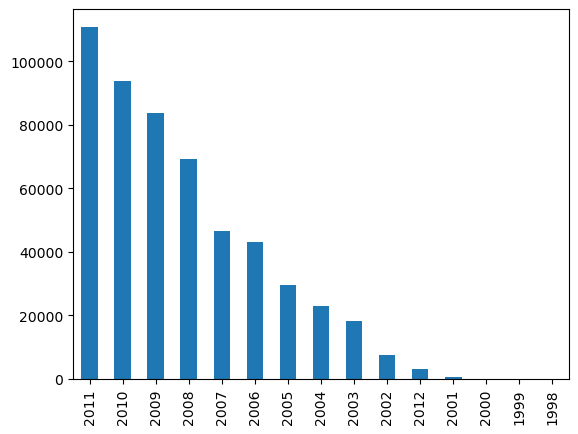

In [49]:
# Graph the number of reviews per year
df["review_year"].value_counts().plot(kind="bar")

In [50]:
# Determine which months have the most reviews
df["review_month"] = df["review_time"].dt.month
df["review_month"].value_counts()

12    49993
11    47518
1     46992
8     45409
10    45356
3     44257
9     43268
5     42692
7     41816
2     41304
4     40341
6     39924
Name: review_month, dtype: int64

<AxesSubplot:>

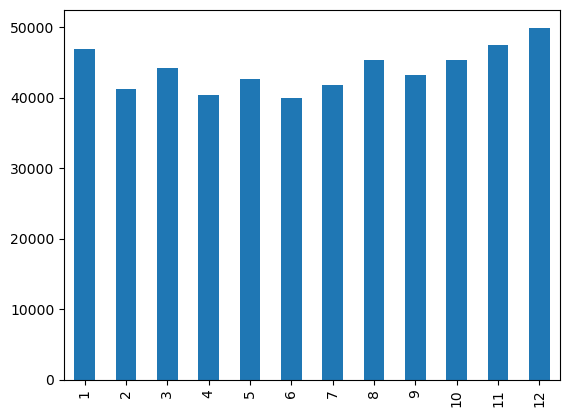

In [51]:
# Graph the number of reviews per month sorted by month
df["review_month"].value_counts().sort_index().plot(kind="bar")

# Q3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [52]:
# Determine the mean for review taste, review aroma, review appearance, review palate, and review overall
# Group them by beer_id
review_df = df.groupby(["beer_beerId"])[["review_taste", "review_aroma", "review_appearance", "review_palette", "review_overall"]].mean()
review_df.head()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
beer_beerId,,,,,
3,4.166667,4.166667,3.833333,4.000000,4.166667
4,3.700000,3.450000,3.950000,3.800000,3.700000
5,3.318396,3.340802,3.485849,3.205189,3.549528
6,3.513113,3.645382,3.836374,3.515964,3.706956
7,3.106980,3.101669,3.251138,3.179059,3.266313


In [53]:
# Determine correllation from review_df
review_df.corr()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.821956,0.659598,0.736896,0.809601
review_aroma,0.821956,1.000000,0.637400,0.813106,0.873737
review_appearance,0.659598,0.637400,1.000000,0.647649,0.614839
review_palette,0.736896,0.813106,0.647649,1.000000,0.747198
review_overall,0.809601,0.873737,0.614839,0.747198,1.000000


<AxesSubplot:>

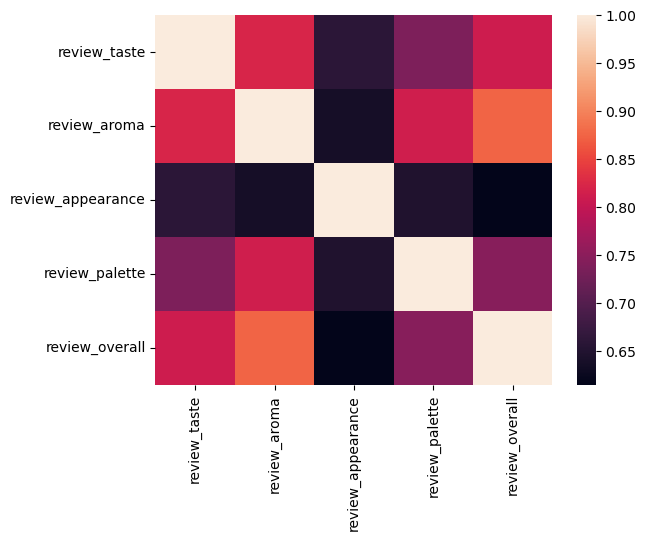

In [54]:
# Import heatmap from seaborn
from seaborn import heatmap

# Create a heatmap of the correlation dataframe
heatmap(review_df.corr())


Q4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [55]:
# Create a new dataframe column that shows the number of reviews for each beer
df["review_count"] = df.groupby(["beer_beerId"])["review_overall"].transform("count")
df["review_count"].value_counts()

1      7135
2      6588
3      5310
4      4672
5      4055
       ... 
142     142
137     137
132     132
123     123
117     117
Name: review_count, Length: 596, dtype: int64

In [56]:
# Create a new dataframe that only contains beers with more than 100 reviews
review_df = df[df["review_count"] > 100]

# Create a new dataframe that only contains the columns we need
review_df = review_df[["beer_beerId", "beer_name", "beer_style", "beer_ABV", "review_taste", "review_aroma", "review_appearance", "review_palette", "review_overall", "review_count"]]

In [57]:
# Find the top 3 beers with the highest average review overall, review_taste, review_aroma and ther are no null values
review_df = review_df.dropna().groupby(["beer_name"]).mean().sort_values(["review_overall", "review_taste", "review_aroma", "review_count"], ascending=False).head(3)

# View the dataframe
review_df

/var/folders/bj/m8tksvx513b63lgr8fw9z7vc0000gn/T/ipykernel_72972/360590570.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  review_df = review_df.dropna().groupby(["beer_name"]).mean().sort_values(["review_overall", "review_taste", "review_aroma", "review_count"], ascending=False).head(3)


,beer_beerId,beer_ABV,review_taste,review_aroma,review_appearance,review_palette,review_overall,review_count
beer_name,,,,,,,,
Citra DIPA,56082.0,8.0,4.373016,4.573413,4.369048,4.690476,4.630952,252.0
Cantillon Blåbær Lambik,36316.0,5.0,4.493590,4.628205,4.644231,4.528846,4.628205,156.0
Heady Topper,16814.0,8.0,4.405117,4.608742,4.163113,4.660981,4.625800,469.0


Q5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?